<a href="https://colab.research.google.com/github/cthitch137/PHYS250/blob/main/Collin_Hitchcock_Lab03_Euler_Radioactive_Decay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: The Euler Method for Integrating Ordinary Differential Equantions

*Written by Rose Finn*

*Adapted from Giordano and Nakanishi, [Computational Physics](https://www.physics.purdue.edu/~hisao/book/), Chapter 1*

# Overview

The goal of this lab is to use the **Euler method** to model system that are changing with time.  If we can describe how the system changes with time, then we can determine how the system changes by stepping it forward in time using  tiny intervals of time.  This is the basic idea behind the Euler method.

In [1]:
# import numpy and pyplot here
import numpy as np
import matplotlib.pyplot as plt

# Function Warm Up

(5 points)

Before starting the lab, we will do one problem to keep building our function-writing skills.

**The problem**: Write a function that calculates the mean and standard deviation for a list of numbers.  Hint: the functions `np.mean()` and `np.std()` should be useful!

Function requirements:
* input = list/array of numbers
* return = mean, std

Be sure to include a descriptive comment string at the beginning of your function.


In [2]:
# your function here
def myfunc(arr):
  stand = np.std(arr)
  mean = np.mean(arr)
  return mean,stand

In [3]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the ``normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution

In [4]:

myvalues = np.random.normal(size=100,loc=100,scale=20)

# Feed the following array into your function
myfunc(myvalues)
# print out the mean and standard deviation
# use a formatted print statement to print two decimal places
print(f'The mean of myvalues is {myfunc(myvalues)[0]:.2f} and the standard deviation is {myfunc(myvalues)[1]:.2f}')

The mean of myvalues is 98.78 and the standard deviation is 20.57


# Radioactive Decay

We will use the Euler method to calculate how many radioactive nuclei survive as a function of time.  We talked about Uranium 235, but this could apply to any radioactive nuclei.  In fact, this could apply to anything that is experiencing an exponential decay.

## Differential Equation Described How $N_U$ Changes With Time

The equation that describes how the number of surviving nuclei changes with time is:

$$ \frac{dN}{dt} = - \frac{N}{\tau} $$

where
* N = number of nuclei present
* $\tau$ = half-live of the nuclei

We can solve this particular [`Ordinary Differential Equation`](https://en.wikipedia.org/wiki/Ordinary_differential_equation) by separating variables and integrating:

1. Separate variables
$$ \frac{dN}{N} = - \frac{dt}{\tau} $$
2. Integrate
$$ \int_{N_0}^N \frac{dN}{N} = - \int_0^t \frac{dt}{\tau} $$
$$ ln(N/N_0) = -\frac{1}{\tau} t $$
3. Raise each side to the exponential
$$ e^{ln(N/N_0)} = e^{-\frac{1}{\tau} t} $$
$$ N/N_0 = e^{-\frac{t}{\tau}} $$
4. This gives the analytic solution to how the number of nuclei changes with time:
$$ N(t) = N_0 e^{-\frac{t}{\tau}} $$

So although we can solve this equation analytically, it is a nice example to use for illustrating how the Euler method works.

## Euler Method

We can write the Taylor Expansion for $N(t)$ as

$$ N(t + Δt) ≈ N(t) + \frac{dN}{dt} \Delta t $$

We can then substitute $ \frac{dN}{dt} = - \frac{N}{\tau} $ to get

$$ N(t + Δt) ≈ N(t) - \frac{N}{\tau} \Delta t $$

Below you will write the functions that we need to calculate how the number of surviving Uranium nuclei ($N_U$) changes with time.


### Write function to set up the time and number arrays

(5 points)

Write a function **initialize** that has the following.

* input
  * N0 = initial number of nuclei
  * tau = decay half-life of the nuclei
  * tmax = how long to calculate N and time
  * dt = the time step to use for advancing the system

* the function will
  * calculate nsteps (this is tmax/dt), and make sure nsteps in an integer.
  * define arrays for time *t* and the number of surviving nuclei *n_nuclei*.  These array should initially be set to zero, and they should have be *nsteps* long.
  * set the first element of *n_nuclei* to N0

* return
  * *t, n_nuclei* arrays

In [5]:
# write function initialize here
def initialize(N0,tau,tmax,dt):
  '''
  Utilizes the ODE to calculate radioactive decay of a nuclei

  INPUT:
  N0 = initial number of nuclei
  tau = decay half-life of the nuclei
  tmax = how long to calculate N and time
  dt = the time step to use for advancing the system

  RETURNS:
  t = array of time (initially set to zeros) with the length of nsteps (tmax/dt)
  n_nuclei = array of number of nuclei (initially set to zeros) with the length of nsteps (tmax/dt)
  '''
  nsteps = int(tmax/dt)
  t = np.zeros(nsteps,'f')
  n_nuclei = np.zeros(nsteps,'f')
  n_nuclei[0]=N0
  return t,n_nuclei

### Write function to implement Euler calculation

(5 points)

Write a function **calculate** that does the following:

* input
  * time array, *t*
  * array containing the number of surviving nuclei at each time step, *n_nuclei*
  * dt
  * tau


* the function will
  * loop over arrays and calculate:

  ```
  n_nuclei[i] = n_nuclei[i-1] - n_nuclei[i-1]/tau * dt
  t[i] = t[i-1] + dt
  ```  

* return
  *  *t, n_nuclei* arrays

In [6]:
# write your calculate function here
def calculate(t,n_nuclei,dt,tau):
  '''
  Euler method used to approximate a number, in this case the numebr of surviving radioactive nuclei

  INPUTS:
  time array, t
  array containing the number of surviving nuclei at each time step, n_nuclei
  dt = the time step to use for advancing the system
  tau = decay half-life of the nuclei

  RETURNS:
  t = array of time with the length of nsteps (tmax/dt)
  n_nuclei = array of number of nuclei with the length of nsteps (tmax/dt)
  '''
  for i in range(1,len(t)):
    n_nuclei[i] = n_nuclei[i-1] - n_nuclei[i-1]/tau * dt
    t[i] = t[i-1] + dt

  return t,n_nuclei


### Running your code

(5 points)

You now just need to set up the initial values and call your functions.

Give the variables the following values:

* start with 100 nuclei
* set the decay half-life to 1 second
* set tmax to 5 seconds
* use a time step of 0.05 s

When you are finished, check your code with your instructor or LA.

In [7]:
############################################################
# This is your main program that will call the functions.
############################################################



# define initial values
N0 = 100 # number of nuclei (quantity)
tau = 1 # half life of each nuclei (seconds)
tmax = 5 # max time (seconds)
dt = 0.05 # time step

# call initialize function
initialize(N0,tau,tmax,dt)

# call your calculate function
calculate(initialize(N0,tau,tmax,dt)[0],initialize(N0,tau,tmax,dt)[1],dt,tau)

time, num_nuc = calculate(initialize(N0,tau,tmax,dt)[0],initialize(N0,tau,tmax,dt)[1],dt,tau)

### Visualizing your results

(5 points)

* Make a plot of the number of nuclei versus time.
* Plot the analytic solution for comparison.

Question:  How well do your calculated values compare with the analytic solution?

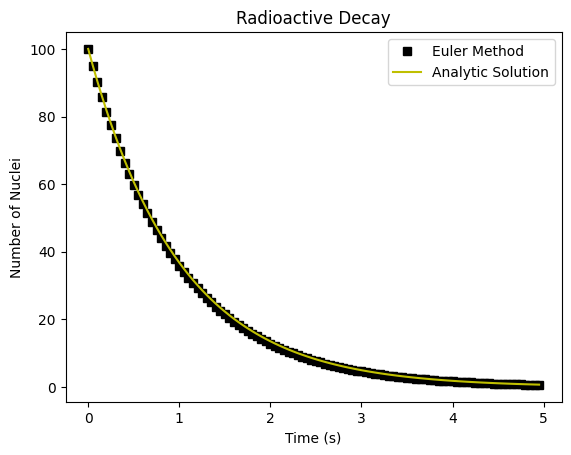

In [8]:
# plot the number of nuclei versus time using black squares
plt.plot(time,num_nuc,'ks',label='Euler Method')

# plot the analytic solution using a solid black line
n_t = N0*(np.e**(-time/tau))
plt.plot(time,n_t,'y',label='Analytic Solution')

plt.title('Radioactive Decay')
plt.xlabel('Time (s)')
plt.ylabel('Number of Nuclei')
plt.legend()

### Investigating how the timesteps affect the accuracy of the approximation

(5 points)

You should find that your calculated values do a good job at recovering the analytic solution.  In this section we will see how the results are affected if we choose a different value for dt.

Specifically, you should calculate the number of nuclei versus time using a time steps of 0.05 sec, 0.2 sec, and 0.5 sec.  Save the output as different names so you can plot all three together with the analytic solution.

Plot the results.
* plot the analytic solution with a line.
* plot the results from the Euler approximation with points, and use different colors and shapes for each time step.
* Make sure your plot has a legend that describes

In [9]:
# code to get number of nuclei and time for dt = 0.05 s
dt1 = 0.05 # time step

time1,num_nuc1 = calculate(initialize(N0,tau,tmax,dt1)[0],initialize(N0,tau,tmax,dt1)[1],dt1,tau)

# code to get number of nuclei and time for dt = 0.2 s
dt2 = 0.2 # time step

time2, num_nuc2 = calculate(initialize(N0,tau,tmax,dt2)[0],initialize(N0,tau,tmax,dt2)[1],dt2,tau)

# code to get number of nuclei and time for dt = 0.5 s
dt3 = 0.5 # time step

time3, num_nuc3 = calculate(initialize(N0,tau,tmax,dt3)[0],initialize(N0,tau,tmax,dt3)[1],dt3,tau)


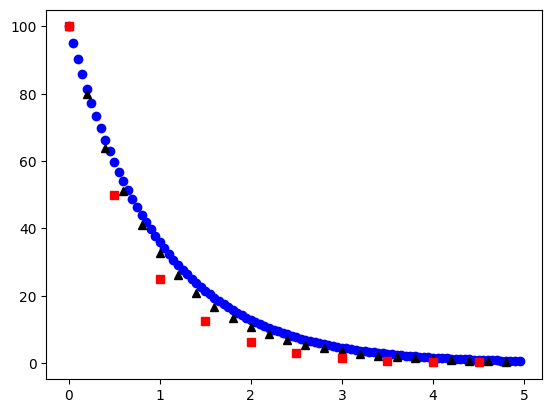

In [33]:
varib = [0.05,0.2,0.5]
marker = ['bo','k^','rs']
time_var = []
nuc_var = []
for i in range(len(varib)):
  t,n = calculate(initialize(N0,tau,tmax,varib[i])[0],initialize(N0,tau,tmax,varib[i])[1],varib[i],tau)
  time_var.append(t)
  nuc_var.append(n)
  plt.plot(time_var[i],nuc_var[i],marker[i])

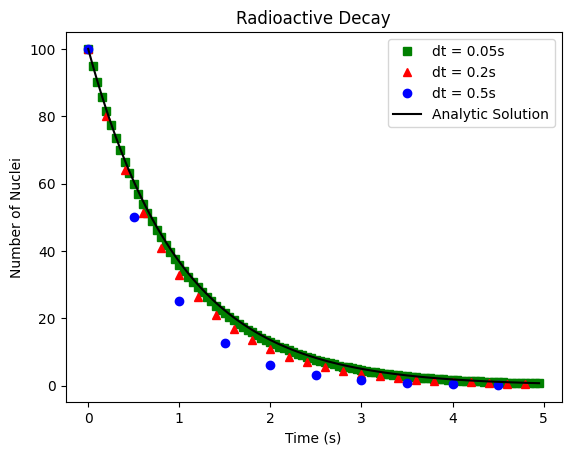

In [19]:
# code to plot the 3 different results
plt.plot(time1,num_nuc1,'gs',label='dt = 0.05s')

plt.plot(time2,num_nuc2,'r^',label='dt = 0.2s')

plt.plot(time3,num_nuc3,'bo',label='dt = 0.5s')

# code to plot the analytic solution
n_t1 = N0*(np.e**(-time/tau))

plt.plot(time,n_t1,'k',label='Analytic Solution')

plt.title('Radioactive Decay')
plt.xlabel('Time (s)')
plt.ylabel('Number of Nuclei')
plt.legend()


# Summarize Your Results



Complete your wiki page for this lab.  Your wiki should have the following elements.

## Background
1. Define what an ordinary differential equation is.
1. Describe what a Taylor Expansion is and why it is useful
1. Describe the general form of the Euler Method and why this is useful for approximating a solution to a differential equation

## This Lab
1. Describe how we apply the Euler method to approximate how the number of Uranium atoms declines as a function of time.
1. Note that in this particular example, we can solve the equation analytically.  Nonetheless, this provides a nice way to introduce the Euler method and examine how some of our numerical choices affect the accuracy of our result.
1. Describe does the time step in the Euler method affect the accuracy of your results.  Include the graph that illustrates how the time step affects the accuracy of your results.